<a href="https://colab.research.google.com/github/ANKITPODDER2000/Natural-Language-Processing-in-TensorFlow/blob/master/tensorflowNLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import tensorflow_datasets as tfds

In [0]:
imdb , info = tfds.load(name="imdb_reviews",with_info=True,as_supervised=True)

In [0]:
train_sentence = []
train_label    = []
test_sentence  = []
test_label     = []

for s,l in imdb['train']:
    train_sentence.append(s.numpy())
    train_label.append(l.numpy())

for s,l in imdb['test']:
    test_sentence.append(s.numpy())
    test_label.append(l.numpy())

In [15]:
print("Details :\n********************************")
print("\nTrain len :\n================================")
print("train_sentence len : ",len(train_sentence))
print("\nTest len :\n================================")
print("test_sentence len : ",len(test_sentence))

Details :
********************************

Train len :
train_sentence len :  25000

Test len :
test_sentence len :  25000


In [0]:
import numpy as np

In [0]:
train_label_final = np.array(train_label)
test_label_final  = np.array(test_label)

In [18]:
print("Details :\n********************************")
print("\nTrain len :\n================================")
print("train_sentence len : ",len(train_sentence))
print("Shape of train_label : ",train_label_final.shape)
print("\nTest len :\n================================")
print("test_sentence len : ",len(test_sentence))
print("Shape of test_label : ",test_label_final.shape)

Details :
********************************

Train len :
train_sentence len :  25000
Shape of train_label :  (25000,)

Test len :
test_sentence len :  25000
Shape of test_label :  (25000,)


In [0]:
for i in range(len(train_sentence)):
    train_sentence[i] = str(train_sentence[i])[2:-1]

In [0]:
for i in range(len(test_sentence)):
    test_sentence[i] = str(test_sentence[i])[2:-1]

In [26]:
print("Details :\n********************************")
print("\nTrain len :\n================================")
print("train_sentence len : ",len(train_sentence))
print("Shape of train_label : ",train_label_final.shape)
print("\nTest len :\n================================")
print("test_sentence len : ",len(test_sentence))
print("Shape of test_label : ",test_label_final.shape)

Details :
********************************

Train len :
train_sentence len :  25000
Shape of train_label :  (25000,)

Test len :
test_sentence len :  25000
Shape of test_label :  (25000,)


In [0]:
#train_sentence[0]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
oov_token = "<OOV>"

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(train_sentence)
word_index = tokenizer.word_index
sequece_train = tokenizer.texts_to_sequences(train_sentence)
X_train = pad_sequences(sequences=sequece_train,maxlen=120,padding='post',truncating="post")

In [31]:
print("Shape of X_train : ",X_train.shape)

Shape of X_train :  (25000, 120)


In [0]:
#X_train[0]

In [0]:
sequence_test = tokenizer.texts_to_sequences(test_sentence)
X_test = pad_sequences(sequence_test,maxlen=120,truncating='post',padding='post')

In [35]:
print("X_test shape : ",X_train.shape)

X_test shape :  (25000, 120)


In [36]:
print("Details :\n********************************")
print("\nTrain Shape :\n================================")
print("X_train shape : ",X_train.shape)
print("Shape of train_label : ",train_label_final.shape)
print("\nTest Shape :\n================================")
print("X_test shape : ",X_test.shape)
print("Shape of test_label : ",test_label_final.shape)

Details :
********************************

Train Shape :
X_train shape :  (25000, 120)
Shape of train_label :  (25000,)

Test Shape :
X_test shape :  (25000, 120)
Shape of test_label :  (25000,)


In [0]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,16,input_length=120),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [39]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model1.fit(X_train,train_label_final,epochs=10,validation_data=(X_test,test_label_final))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4947 - acc: 0.7439 - val_loss: 0.3876 - val_acc: 0.8262
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2355 - acc: 0.9100 - val_loss: 0.4160 - val_acc: 0.8160
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0874 - acc: 0.9779 - val_loss: 0.5137 - val_acc: 0.8057
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0215 - acc: 0.9973 - val_loss: 0.6006 - val_acc: 0.8047
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0052 - acc: 0.9996 - val_loss: 0.6740 - val_acc: 0.8060
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.7319 - val_acc: 0.8067
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 8.2411e-04 - acc: 1.0000 - val_loss: 0.7812 - val_acc: 0.8066
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plotHostory(history):
    fig,ax = plt.subplots(1,2,figsize=(20,9))

    ax[0].plot(history.history['acc'],label="Train",marker='o')
    ax[0].plot(history.history['val_acc'],label = "Test",marker='o')
    ax[1].set_title("Accurecy")
    ax[0].legend()

    ax[1].plot(history.history['loss'],label="Train",marker='o')
    ax[1].plot(history.history['val_loss'],label = "Test",marker='o')
    ax[1].set_title("Loss")
    ax[1].legend()

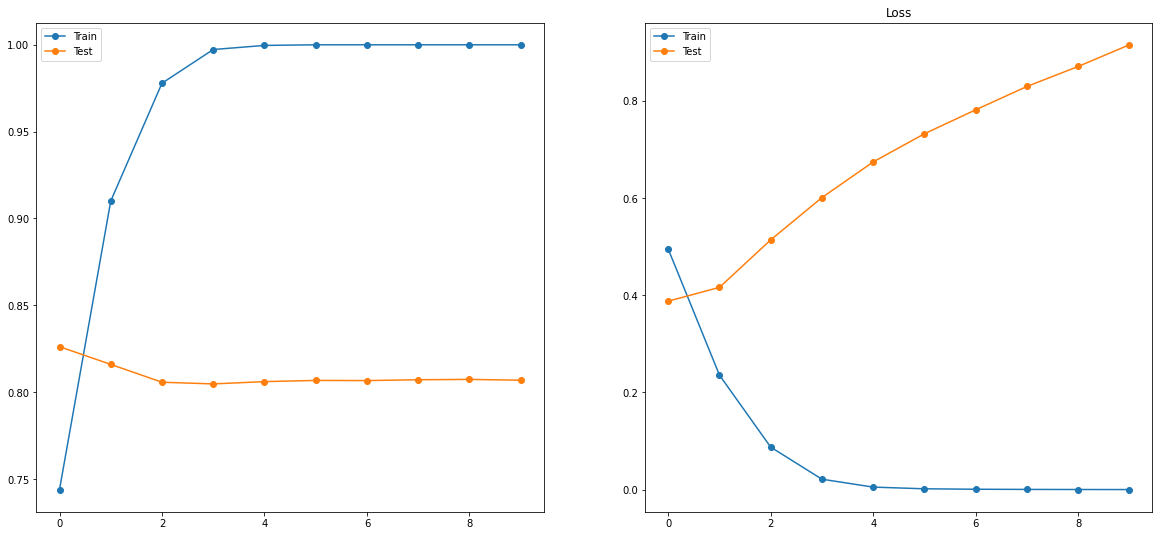

In [48]:
plotHostory(history)